# Graph Isomorphism Problem

### Introduction

The Graph Isomorphism problem is an infamous computational problem that has yet to be solved. The persisting problem is this: The problem itself isnt the most difficult thing to grasp the concept of, however the problem has proven to be challenging because of how subtle it is.The graphs vertexes and edges must be exactly the same (**Isomorphism**).

This can be done on smaller graphs quite easily, however as a graph **grows and becomes more complex**, it becomes more and more difficult to verify if it is isomorphic or not.

Isomorphism : *G1 = (V1, E1) = G2 = (V2, E2)*

*where 
G = Graph
V = Vertexes
E = Edges*

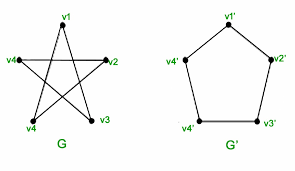

The diagram above shows 2 graphs which are **isomorphic**. However the two graphs looks very different but using the above formula it is proven that they are in fact the same graph.

This is provable by studying the above diagram and realising that the edges and vertexes of the graph are actually the same.

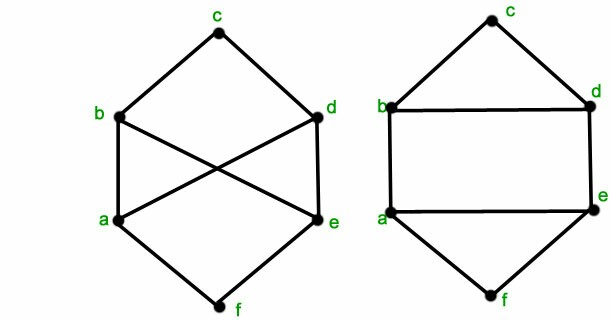

The Second diagram shows 2 more graphs which you might assume to be isomorphic, however when we study them. It becomes apparent that they are not **isomorphic**. The difference is subtle and you can never really assume anything in a field of mathematics, so going through the formula is the only way to truly verify if two graphs are isomorphic or not.

### P vs NP

The P vs NP problem is a major problem that has yet to be solved in mathematics, that basically is the the essence of what was discussed above. The Question is, can a problem be quickly solved and quickly verified in polynomial time. It is **widely believed** for the most part, that *P != NP* which if true would mean that problems that are NP are harder to compute than to verify. they couldnt be solved in polynomial time but could be verified within it.

Formula : **P = NP**

*Where
P = Polynomial Time
NP = Nondeternimistic Polynomial Time*

A hungarian scientist by the name of **laszló Babai** has had breakthough results in recent years hwoever they are still being fully verified which takes time. His results were proof that the graph isomorphism problem could be solved in **quasi-polynomial** time.

### Bijections

In Graph theory is it important to note that graph isomorphisms are bijections. A Bijection (**one-to-one correspondence**) is a way that two graphs match up. This is also know as a function that is both injective and surjective at the same time. For a given injective function f(x) is mapped onto a surjective function f(y) as seen below. Another name for this is a bijective function.Bijectivity is an imortant concept that is key to understanding isomorphism.

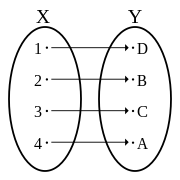

### How Graphs can be represented in data structures

Graphs in data structures are **non-linear** data structures made up of a finite number of nodes or vertices. Graphs are used to interperate real world problems and are used in the study of almost everything, as they offer a broad mathematic study of a given subject. Examples of this are logistic networks, Electricity grids, telephone networks and so on.

### Infinite vs Finite Graphs

A **Finite graph** is a graph that has a limited numner of nodes and edge. This is typically the type of graph that i used in context with **graph isomorphism**.

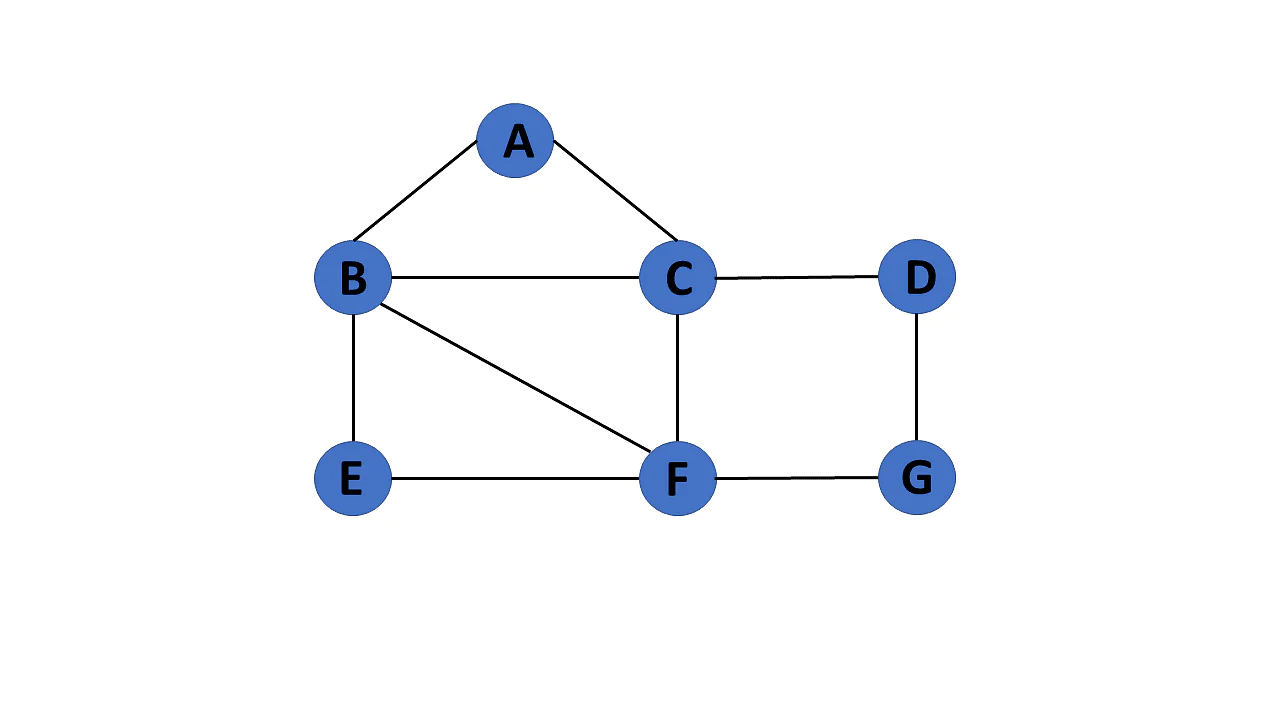

A **Infinite graph** is a graph that has no limit on its vertices and edges. This graph is not something which we have considered as it is **not integral to graph isomorphism**.

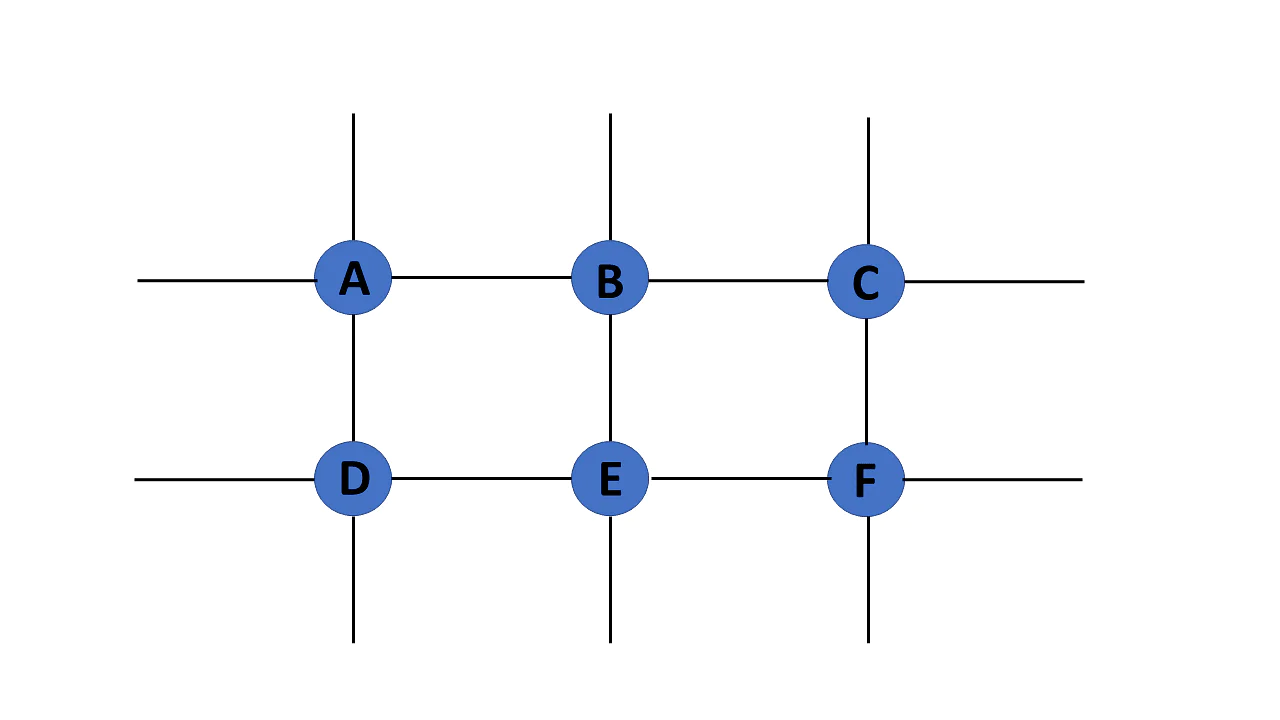

Note: *Digraphs and Undirected Graphs are another relevant topic which are discussed in the Heap Sort Notebook located in this repository*.

### Adjacency Matrix

An adjacency Matrix is a method of converting graphs to binary strings. This can alos be represented as a square matrix, The elements of the matrix show whether pairs of vertices are adjacent or not in the graph. This is important especially for converting the matrix back into a graph.

### Implementation

In [9]:
#code is a work in progress, and is referenced below.


import itertools
import numpy as np

def get_graph_order(adj_matrix):
    if len(adj_matrix) != len(adj_matrix[0]):
        return -1
    else:
        return len(adj_matrix)


def get_degree_sequence(adj_matrix):
    degree_sequence = []
    for vertex in range(len(adj_matrix)):
        degree_sequence.append(sum(adj_matrix[vertex]))
    degree_sequence.sort(reverse=True)
    return degree_sequence


def get_all_vertex_permutations(adj_matrix):
    if get_graph_order(adj_matrix) > 8:
        print("This function is too inefficient for graph order > 8")
        return -1
    all_adj_matrix = []
    idx = list(range(len(adj_matrix)))
    possible_idx_combinations = [
        list(i) for i in itertools.permutations(idx, len(idx))
    ]
    for idx_comb in possible_idx_combinations:
        a = adj_matrix
        a = a[idx_comb]
        a = np.transpose(np.transpose(a)[idx_comb])
        all_adj_matrix.append({
            "perm_vertex":
            idx_comb,
            "adj_matrix":
            a
        })

    return all_adj_matrix


def brute_force_test_graph_isomporphism(adj_1, adj_2):
    degree_sequence_1 = get_degree_sequence(adj_1)
    degree_sequence_2 = get_degree_sequence(adj_2)
    if get_graph_order(adj_1) != get_graph_order(adj_1):
        return False
    elif np.array_equal(degree_sequence_1, degree_sequence_2) == False:
        return False
    else:
        for adj_matrix in list(
                map(lambda matrix: matrix["adj_matrix"],
                    get_all_vertex_permutations(adj_2))):
            if np.array_equal(adj_1, adj_matrix) == True:
                return True
    return False

#this code is a verifiation method for proving two graphs are isomorphic

Code below shows a binary string adjacency matrix:

In [15]:
# Adjacency Matrix representation in Python
class Graph(object):

    # Initialize the matrix
    def __init__(self, size):
        self.adjMatrix = []
        for i in range(size):
            self.adjMatrix.append([0 for i in range(size)])
        self.size = size

    # Add edges
    def add_edge(self, v1, v2):
        if v1 == v2:
            print("Same vertex %d and %d" % (v1, v2))
        self.adjMatrix[v1][v2] = 1
        self.adjMatrix[v2][v1] = 1

    # Remove edges
    def remove_edge(self, v1, v2):
        if self.adjMatrix[v1][v2] == 0:
            print("No edge between %d and %d" % (v1, v2))
            return
        self.adjMatrix[v1][v2] = 0
        self.adjMatrix[v2][v1] = 0

    def __len__(self):
        return self.size

    # Print the matrix
    def print_matrix(self):
        for row in self.adjMatrix:
            for val in row:
                print('{:4}'.format(val)),
            print


def main():
    g = Graph(7)
    g.add_edge(4, 0)
    g.add_edge(4, 2)
    g.add_edge(2, 5)
    g.add_edge(6, 2)
    g.add_edge(2, 5)
    g.add_edge(6, 2)
    g.add_edge(2, 5)

    g.print_matrix()


if __name__ == '__main__':
    main()

   0
   0
   0
   0
   1
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   1
   1
   1
   0
   0
   0
   0
   0
   0
   0
   1
   0
   1
   0
   0
   0
   0
   0
   0
   1
   0
   0
   0
   0
   0
   0
   1
   0
   0
   0
   0


### Discussion of computational Complexity 

Graph isomorphism became a well established problem back in the 1970's, when it emerged as a natural problem with a NP complexity. It wasnt solvable with an efficient algorithm but was possible to brute force. This means that László Babai and his working have been the only breakthrough in recent times. Before we basically had to do this problem in a step by step process and had to easy way up up the efficiency of the problem solving. 

This is due to the nature of the problem and the elements of it that need to be done one at a time. There is no way to solve this method that has been verified that has an efficient way to get through the problem. This becomes obvious when we look at larger and larger graphs that become very complex and require alot of computation.

Babai's Quasi-polynomial Time Solution would prove the problem to be P complexity, which places it into problems that can be solved efficiently as discussed in the intro. This means that fi his work is verified, would solve a problem that wasnt thought to be solvable for the last few decades.

His work has seemed to rattle the cage in terms of the fact that it was widely believed this problem, before the solution was presented was NP Complete.

The problem itself was one of the few natural problems in modern day mathematics and computation that was placed in a grey zone been being P or NP complete.

As for the not yet verified status of graph isomorphism, it is still up for debate whether it is N or NP. Some people still think that it is NP-complete and there will never be an algorithm capable of solving this very complex computiong problem.

### References

TeX - LaTeX Stack Exchange. (n.d.). diagrams - How to draw animated isomorphic graphs? [online] Available at: https://tex.stackexchange.com/questions/478689/how-to-draw-animated-isomorphic-graphs [Accessed 8 May 2022].

Cañada, T. (2022). Brute-force code for Isomorphisms. [online] Medium. Available at: https://tonicanada.medium.com/brute-force-code-for-isomorphisms-1241ef180570 [Accessed 8 May 2022].

Wikipedia. (2022). Bijection. [online] Available at: https://en.wikipedia.org/wiki/Bijection#:~:text=In%20mathematics%2C%20a%20bijection%2C%20also [Accessed 8 May 2022].

Simplilearn.com. (n.d.). Graphs in Data Structure: Overview, Types & More | Simplilearn. [online] Available at: https://www.simplilearn.com/tutorials/data-structure-tutorial/graphs-in-data-structure.

www.programiz.com. (n.d.). Graph Adjacency Matrix (With code examples in C++, Java and Python). [online] Available at: https://www.programiz.com/dsa/graph-adjacency-matrix#:~:text=An%20adjacency%20matrix%20is%20a [Accessed 8 May 2022].

Schweitzer, M.G., Pascal (n.d.). The Graph Isomorphism Problem. [online] cacm.acm.org. Available at: https://cacm.acm.org/magazines/2020/11/248220-the-graph-isomorphism-problem/fulltext.